In [15]:
#To import required libraries to solve q2
import cv2 
import matplotlib.pyplot as plt
import numpy as np
import imutils
%matplotlib inline 

In [16]:
# To read two images 
image1 = cv2.imread("p2.jpg")
image2 = cv2.imread("p1.jpg")

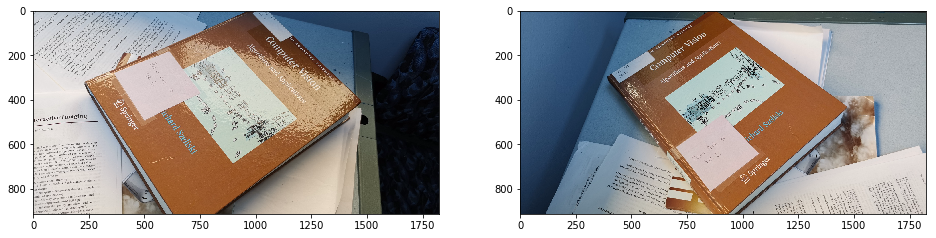

In [17]:
# To convert images color to Gray and show images:
figure, ax = plt.subplots(1, 2, figsize=(16, 16))


ax[0].imshow(image1)
ax[1].imshow(image2)

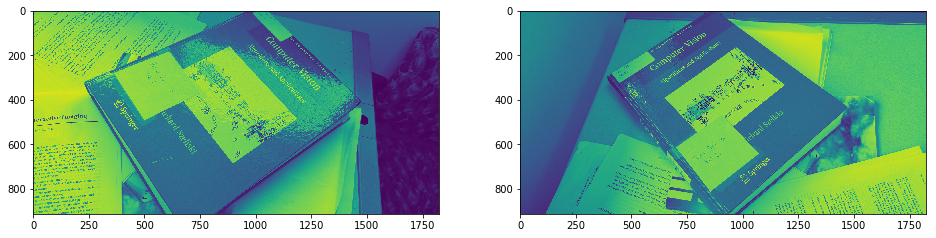

In [18]:
# To convert images into Gray Color:
image1GRAY = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
image2GRAY = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)


#To Show images in Gray scale:
figure, ax = plt.subplots(1, 2, figsize=(16, 16))


ax[0].imshow(image1GRAY)
ax[1].imshow(image2GRAY)

In [19]:
#To initiate the SIFT detector:
sift = cv2.xfeatures2d.SIFT_create()


#To compute the keypoints and descriptors for images using SIFT
keyPoints1, descriptors1 = sift.detectAndCompute(image1GRAY, None)
keyPoints2, descriptors2 = sift.detectAndCompute(image2GRAY, None)

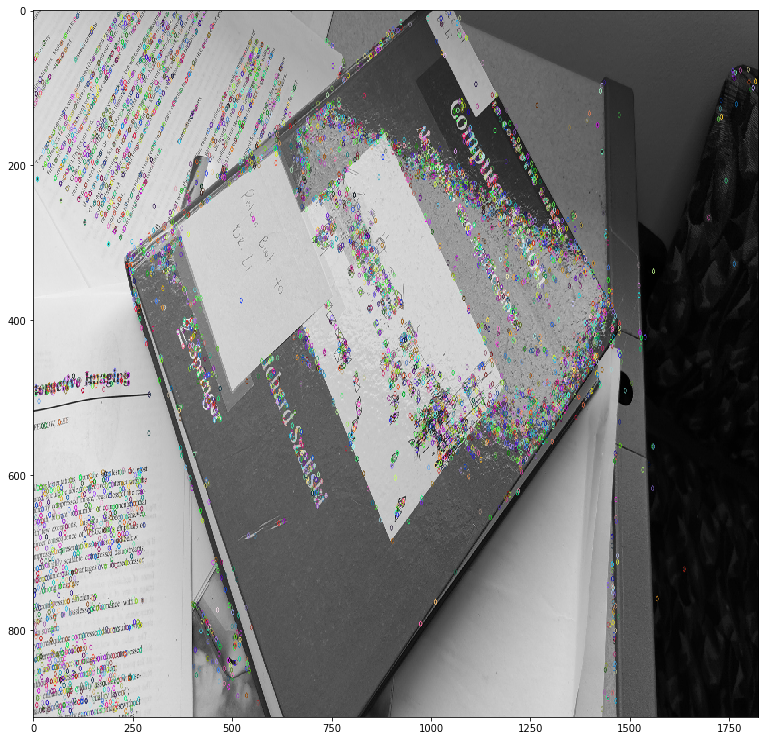

In [20]:
#To draw detected keypoints on the first image and show them:
plt.figure(figsize = (13,13))
image1_KD = cv2.drawKeypoints(image1GRAY, keyPoints1, image1GRAY)
plt.imshow(image1_KD, interpolation='none', aspect='auto')

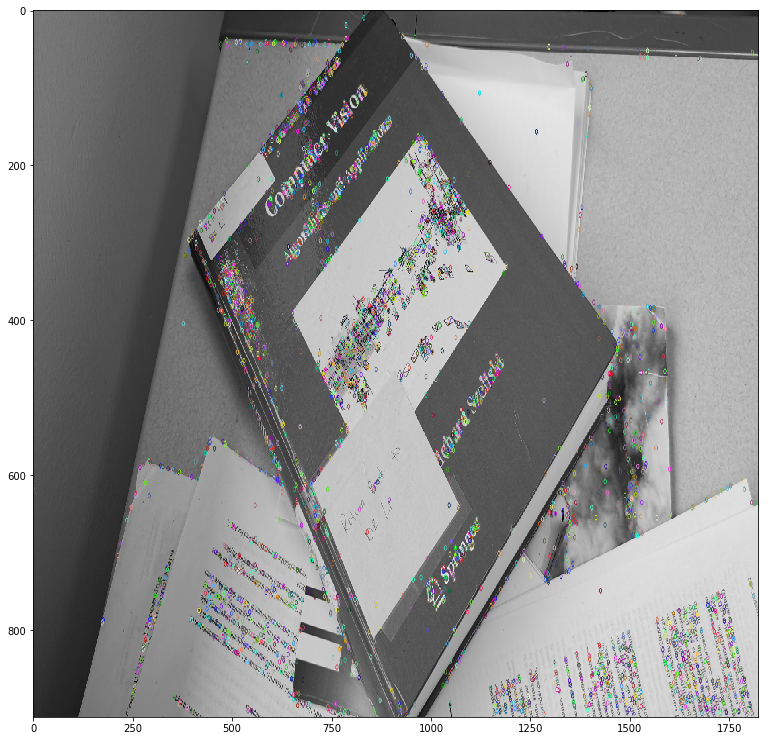

In [21]:
# To draw detected keypoints on image 2 and show them:

plt.figure(figsize = (13,13))
image2_KD = cv2.drawKeypoints(image2GRAY, keyPoints2, image2GRAY)
plt.imshow(image2_KD, interpolation='none', aspect='auto')

In [27]:
#To setup feature matching tool:
sift_match = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

matches = sift_match.match(descriptors1,descriptors2)
matches = sorted(matches, key = lambda x:x.distance)

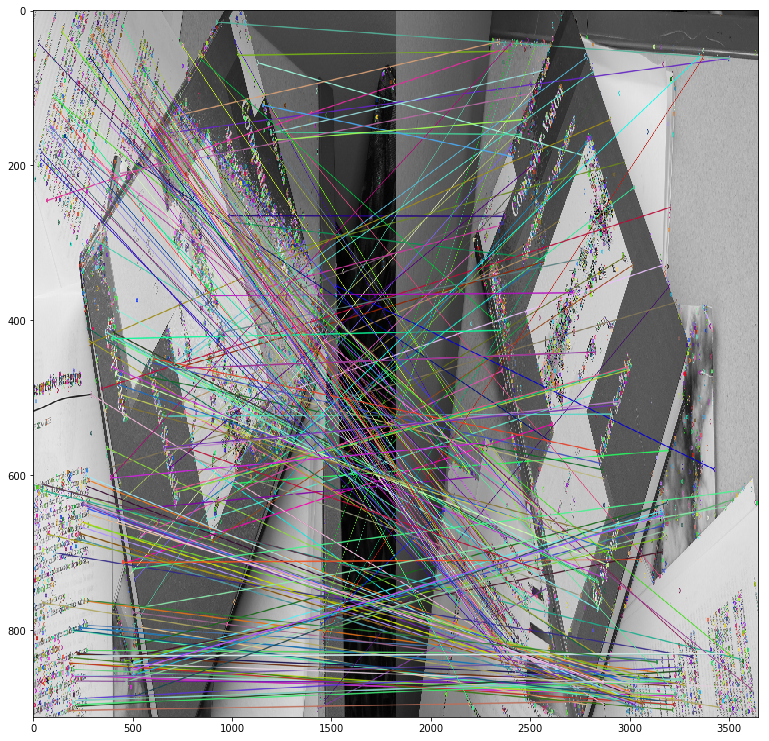

(<matplotlib.image.AxesImage at 0x7fcff0f15358>, None)

In [37]:
#To draw the matching result:
plt.figure(figsize = (13,13))
finalResult = cv2.drawMatches(image1_KD, keyPoints1, image2_KD, keyPoints2, matches[:250], image1_KD, flags=2)
plt.imshow(finalResult, interpolation='none', aspect='auto'),plt.show()

In [38]:
src_pts = np.float32([ keyPoints1[m.queryIdx].pt for m in matches ]).reshape(-1,1,2)
dst_pts = np.float32([ keyPoints2[m.trainIdx].pt for m in matches ]).reshape(-1,1,2)


M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
matchesMask = mask.ravel().tolist()

h,w = image1GRAY.shape

pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
dst = cv2.perspectiveTransform(pts,M)


image2GRAY = cv2.polylines(image1GRAY,[np.int32(dst)],True,255,3, cv2.LINE_AA)

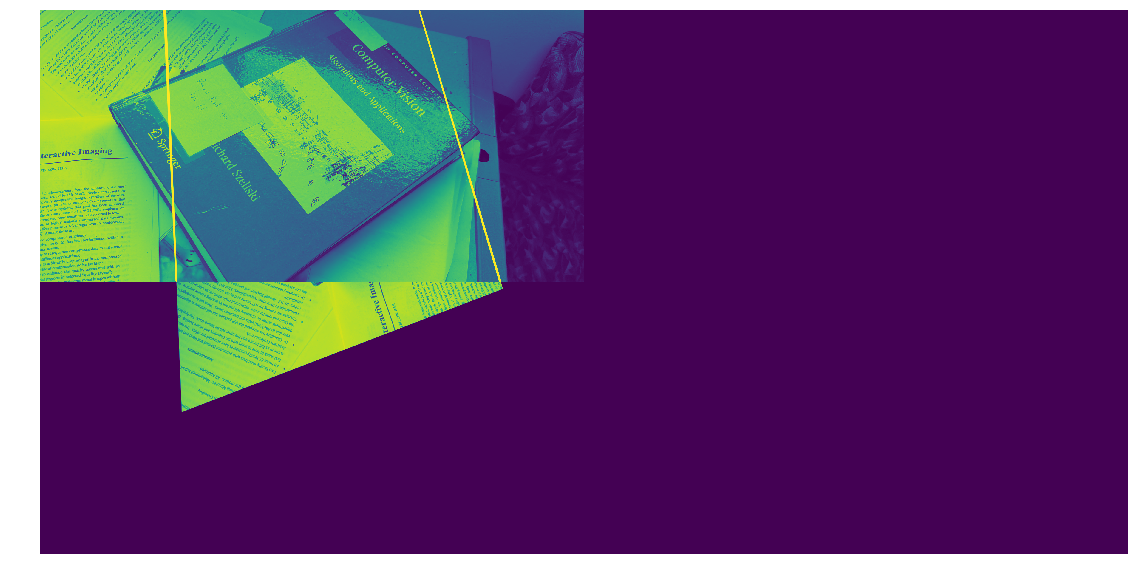

In [39]:
# Apply panorama correction
width = image1GRAY.shape[1] + image2GRAY.shape[1]
height = image1GRAY.shape[0] + image2GRAY.shape[0]

result = cv2.warpPerspective(image1GRAY, M, (width, height))
result[0:image1GRAY.shape[0], 0:image2GRAY.shape[1]] = image2GRAY

plt.figure(figsize=(20,10))
plt.imshow(result)

plt.axis('off')
plt.show()

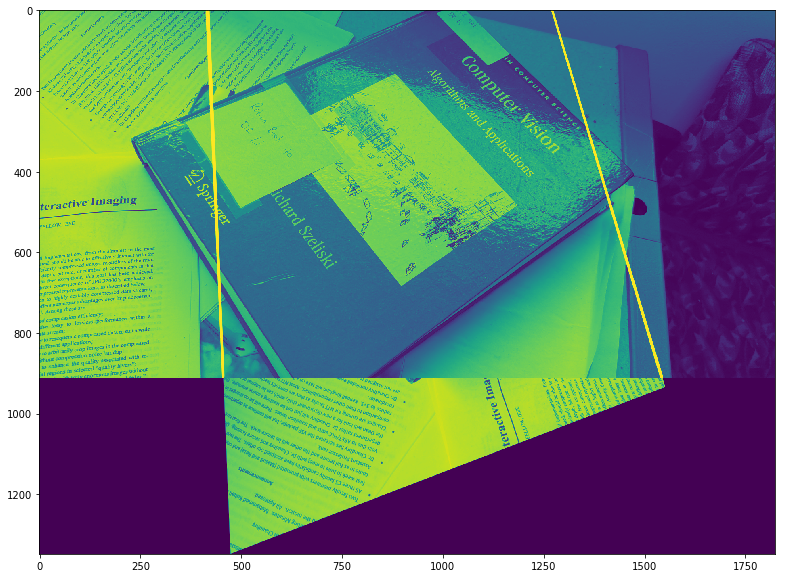

In [40]:
# transform the panorama image to grayscale and threshold it 


thresh = cv2.threshold(result, 0, 255, cv2.THRESH_BINARY)[1]

# Finds contours from the binary image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

# get the maximum contour area
c = max(cnts, key=cv2.contourArea)

# get a bbox from the contour area
(x, y, w, h) = cv2.boundingRect(c)

# crop the image to the bbox coordinates
result = result[y:y + h, x:x + w]

# show the cropped image
plt.figure(figsize=(20,10))
plt.imshow(result)